# Cherry Blossoms!

If we travel back in time, [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were once in full bloom! We don't live in Japan or DC, but in non-COVID times we also have the [Brooklyn Botanic Garden's annual festival](https://www.bbg.org/visit/event/sakura_matsuri_2020).

We'll have to make up for it with data-driven cherry blossoms instead. Once upon a time [Data is Plural](https://tinyletter.com/data-is-plural) linked to [a dataset](http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/) about when the cherry trees blossom each year. It's completely out of date, but it's quirky in a real nice way so we're sticking with it.

## 0. Do all of your importing/setup stuff

In [1]:
import pandas as pd

## 1. Read in the file using pandas, and look at the first five rows

In [19]:

#reading the pdf
df = pd.read_excel(
    'KyotoFullFlower7.xls',
    engine='xlrd',
)
    

#first 5 rows
df.head(5)

,"Full-flowering dates of Japanese cherry (Prunus jamasakura) at Kyoto, Japan. (Latest version, Jun. 12, 2012)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,This phenological data was acquired by followi...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Column A; A.D.,NaN,NaN,NaN,NaN,NaN
3,Column B; Full-flowering date (day of year).,NaN,NaN,NaN,NaN,NaN
4,"Column C; Full-flowering date (calender date, ...",NaN,NaN,NaN,NaN,NaN


## 2. Read in the file using pandas CORRECTLY, and look at the first five rows

Hrm, how do your column names look? Read the file in again but this time use the `skiprows=` parameter to skip the rows you don't want.

**TIP: The first year should be 801 AD, and it should not have any dates or anything.**

In [ ]:
#reading the pdf
df = pd.read_excel(
    'KyotoFullFlower7.xls',
    engine='xlrd',
    skiprows=25,
    na_values=['','0','NaN','Unknown','UNKNOWN'],
) 


#first 5 rows
df.head(5)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,-
1,802,NaN,NaN,NaN,NaN,-
2,803,NaN,NaN,NaN,NaN,-
3,804,NaN,NaN,NaN,NaN,-
4,805,NaN,NaN,NaN,NaN,-


## 3. Look at the final five rows of the data

In [22]:
df.tail()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1210,2011,99.0,409.0,8.0,NaN,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,NaN,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,NaN,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,NaN,NEWS-PAPER(ARASHIYAMA)
1214,2015,93.0,403.0,8.0,NaN,NEWS-PAPER(ARASHIYAMA)


## 4. Add some more NaN values

It looks like you should probably have some NaN/missing values earlier on in the dataset under "Reference name." Read in the file *one more time*, this time making sure all of those missing reference names actually show up as `NaN` instead of `-`.

In [23]:
#reading the pdf
df = pd.read_excel(
    'KyotoFullFlower7.xls',
    engine='xlrd',
    skiprows=25,
    na_values=['','0','NaN','Unknown','UNKNOWN','-'],
) 


#first 5 rows
df.head(5)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN


Series([], Name: count, dtype: int64)

## 4. What source is the most common as a reference?

In [28]:
df['Reference Name'].value_counts().head()

Reference Name
NEWS-PAPER(ARASHIYAMA)        94
SUGIURAKE-NIKKI               38
MYOHOIN-HINAMIKI              32
OYUDONONO-UENO-NIKKI          26
OYUDONONO-UENO-NIKKI [EDA]    21
Name: count, dtype: int64

## 6. Filter the list to only include columns where the `Full-flowering date (DOY)` is not missing

Remember, NaN is not a string, you need a special approach to filtering missing data.

In [30]:
df['Full-flowering date (DOY)'].value_counts(dropna= True)

Full-flowering date (DOY)
104.0    56
105.0    53
106.0    49
102.0    48
103.0    47
108.0    46
107.0    41
109.0    41
101.0    38
98.0     37
112.0    36
99.0     36
110.0    35
111.0    32
100.0    32
97.0     31
113.0    22
96.0     21
95.0     19
93.0     15
114.0    14
115.0    13
94.0     11
116.0     9
120.0     8
117.0     7
92.0      6
87.0      4
119.0     4
91.0      4
118.0     3
88.0      2
89.0      2
122.0     2
90.0      1
124.0     1
86.0      1
Name: count, dtype: int64

## 7. Make a histogram of the full-flowering date

<Axes: >

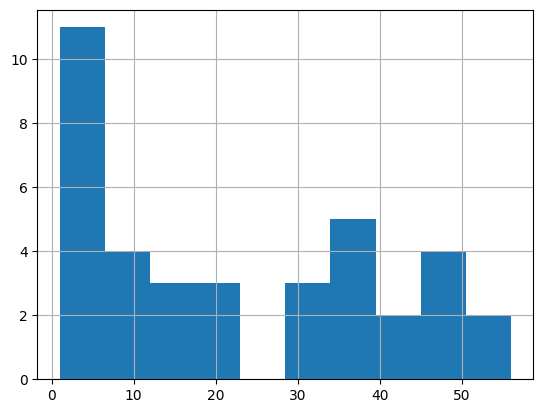

In [32]:
df['Full-flowering date (DOY)'].value_counts(dropna= True).hist()

## 8. Make another histogram of the full-flowering date, but with 39 bins instead of 10

<Axes: >

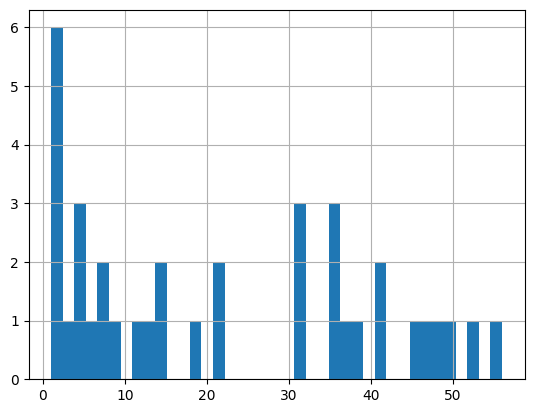

In [33]:
df['Full-flowering date (DOY)'].value_counts(dropna= True).hist(bins=39)

## 9. What's the average number of days it takes for the flowers to blossom? And how many records do we have?

Answer these both with one line of code.

In [40]:
df['Full-flowering date (DOY)'].agg(['mean', 'count'])


mean     104.540508
count    827.000000
Name: Full-flowering date (DOY), dtype: float64

## 10. What's the average days into the year cherry flowers normally blossomed before 1900?



In [42]:
df[df['AD'] < 1900]['Full-flowering date (DOY)'].mean()

np.float64(105.20728291316527)

## 11. How about after 1900?

In [43]:
df[df['AD'] > 1900]['Full-flowering date (DOY)'].mean()

np.float64(100.3125)

## 12. How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [49]:
(df['Data type code'] == 4).sum()


np.int64(39)

## 13. Show only the years where our data was from a title in Japanese poetry

In [46]:
df[df['Data type code']== 4]['AD'].value_counts()

AD
891     1
1447    1
1268    1
1269    1
1271    1
1289    1
1301    1
1324    1
1330    1
1453    1
1236    1
1454    1
1474    1
1534    1
1592    1
1640    1
1661    1
1846    1
1265    1
1223    1
895     1
1060    1
896     1
923     1
955     1
969     1
1007    1
1033    1
1036    1
1061    1
1221    1
1084    1
1095    1
1182    1
1190    1
1201    1
1216    1
1219    1
1863    1
Name: count, dtype: int64

## 14. Graph the full-flowering date (DOY) over time

<Axes: title={'center': 'Mean AD by Full-flowering DOY'}, xlabel='Full-flowering date (DOY)'>

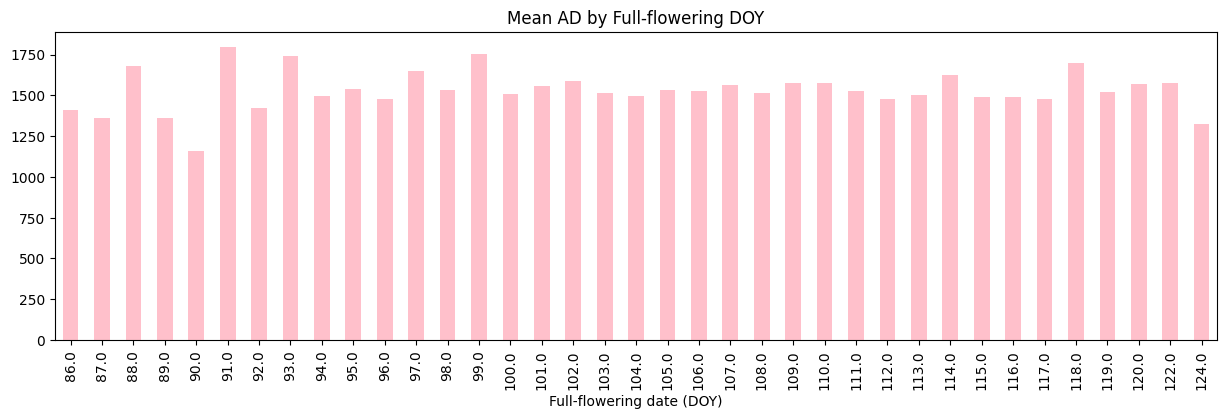

In [53]:
df.groupby('Full-flowering date (DOY)')['AD'].mean().plot(
    kind='bar',
    figsize=(15,4),
    title='Mean AD by Full-flowering DOY',
    color='pink'
)

## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

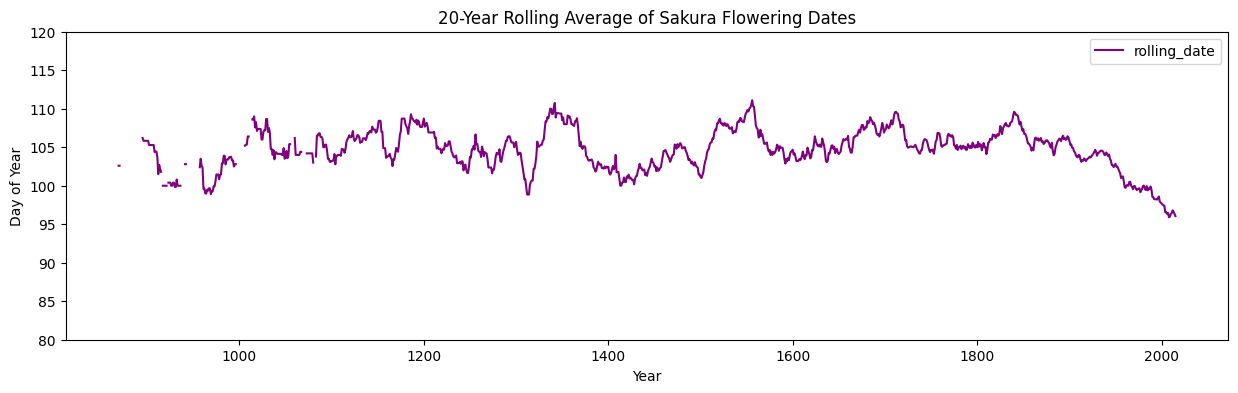

In [56]:
import matplotlib.pyplot as plt

#  annual average flowering date
annual_df = df.groupby('AD')['Full-flowering date (DOY)'].mean().reset_index()

# 20-year rolling average
annual_df['rolling_date'] = annual_df['Full-flowering date (DOY)'].rolling(
    window=20,      # 20-year rolling
    min_periods=5    # require at least 5 years of data
).mean()

# Plot
annual_df.plot(
    x='AD',
    y='rolling_date',
    figsize=(15,4),
    title='20-Year Rolling Average of Sakura Flowering Dates',
    color='purple',
    ylim=(80, 120)
)

plt.xlabel('Year')
plt.ylabel('Day of Year')
plt.show()


Use the code above (or ChatGPT) to create a new column called `rolling_date` in our dataset. It should be the 20-year rolling average of the flowering date. Then plot it, with the year on the x axis and the day of the year on the y axis.

Try adding `ylim=(80, 120)` to your `.plot` command to make things look a little less dire.

### 16. Add a true column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

To convert a string that *looks* like a date into something that *is* a date you use `pd.to_datetime(df['colname'])`. Usually you're converting nice dates like `2025-01-01`, but in this case it's much worse.

If pandas doesn't figure it out automatically with `pd.to_datetime`, you need to pass a `format=` argument that explains what the format is of the datetime. You use [the codes here](https://strftime.org/) to mark out where the days, months, etc are. For example, `2020-04-09` would be converted using `pd.to_datetime(df['colname'], "format='%Y-%m-%d")`. **How would you describe the format of the current date data?**

* Adding `errors='coerce'` will return `NaN` for missing values. By default it just yells "I don't know what to do!!!"

In [112]:

# adding a new column
df['flower_dt'] = pd.to_datetime(
    df['AD'].fillna(0).astype(int).astype(str) + '-' + 
    df['Full-flowering date'].fillna(0).astype(int).astype(str).str.zfill(4).str[:2] + '-' +
    df['Full-flowering date'].fillna(0).astype(int).astype(str).str.zfill(4).str[2:],
    format='%Y-%m-%d',
    errors='coerce'
)




In [113]:
#reading in the data
df.tail()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,flower_dt
1210,2011,99.0,409.0,8.0,NaN,NEWS-PAPER(ARASHIYAMA),2011-04-09
1211,2012,101.0,410.0,8.0,NaN,NEWS-PAPER(ARASHIYAMA),2012-04-10
1212,2013,93.0,403.0,8.0,NaN,NEWS-PAPER(ARASHIYAMA),2013-04-03
1213,2014,94.0,404.0,8.0,NaN,NEWS-PAPER(ARASHIYAMA),2014-04-04
1214,2015,93.0,403.0,8.0,NaN,NEWS-PAPER(ARASHIYAMA),2015-04-03


### 17. Using your new column, how many blossomings happened in each month?

You can extract the month from the datetime column using `df['colname'].dt.month`.

In [114]:
#extracting the month

df['Months'] = pd.to_datetime(
    df['Full-flowering date'].fillna(0).astype(int).astype(str).str.zfill(4).str[:2] + '-' +
    df['Full-flowering date'].fillna(0).astype(int).astype(str).str.zfill(4).str[2:],
    format='%m-%d',
    errors='coerce'
)

df['Months']



0             NaT
1             NaT
2             NaT
3             NaT
4             NaT
          ...    
1210   1900-04-09
1211   1900-04-10
1212   1900-04-03
1213   1900-04-04
1214   1900-04-03
Name: Months, Length: 1215, dtype: datetime64[ns]

### 18. Graph how many blossomings happened in each month.

Hopefully you're just adding `.plot()` onto the last answer.

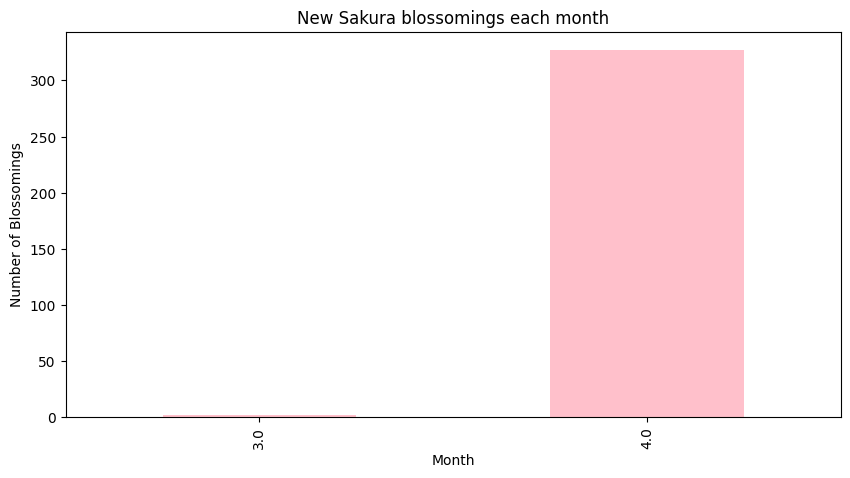

In [ ]:
df['Months'].dt.month.value_counts().sort_index().plot(
    kind='bar',
    figsize=(10,5),
    color='pink',
    title='New Sakura blossomings each month'
)
plt.xlabel('Month')
plt.ylabel('Number of Blossomings')
plt.show()
    


# YOU ARE DONE.

And **incredible.**